# Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#load in data
df = pd.read_csv('eth-perp_master.csv') 

# Add features and create target variables

In [3]:
def add_features(df, minutes):
    register_matplotlib_converters()
    plt.style.use('ggplot')

    #change timestamp column to datetime 
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    ##view the data
    plt.title('ETH-PERP Price')
    plt.plot(df.timestamp, df.close)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

    # keep the columns ['close', 'timestamp']
    df = df[['close', 'timestamp']]

    #make timestamp the index and inplace = True to change the df
    df.set_index('timestamp', inplace=True)


    # minutes indicates the number of minutes to be used to calculate: returns, high, low, volatility
    # for every 'minutes' rows in the dataframe df
    df['returns'] = np.log(df['close'] / df['close'].shift(minutes-1))
    df['volatility'] = df['close'].diff().rolling(minutes-1).std()  # daily volatility over the past 5 days
    df['high'] = df['close'].rolling(minutes).max()
    df['low'] = df['close'].rolling(minutes).min()
    df['range'] = df['high'] - df['low']

    # plot high and low
    plt.plot(df.high, label='high')
    plt.plot(df.low, label='low')
    plt.title('High and Low')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # plot volatility
    plt.plot(df.volatility, label='volatility')
    plt.title('Volatility')
    plt.ylabel('Volatility')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.show()

    # plot returns
    plt.plot(df.returns, label='returns')
    plt.title('Returns')
    plt.ylabel('Returns')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.show()

    # plot range
    plt.plot(df['range'], label='range')
    plt.title('Range')
    plt.ylabel('Range')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.show()

    # get data of row 59, and then 119, 179, 239, etc.
    df_final = df.iloc[59::60, :]
    # add the 2 target variables next_hour_high and next_hour_low
    df_final['next_hour_high'] = df_final['high'].shift(-1)
    df_final['next_hour_low'] = df_final['low'].shift(-1)
    # drop the last row
    df_final.drop(df_final.tail(1).index, inplace=True)
    
    return df_final

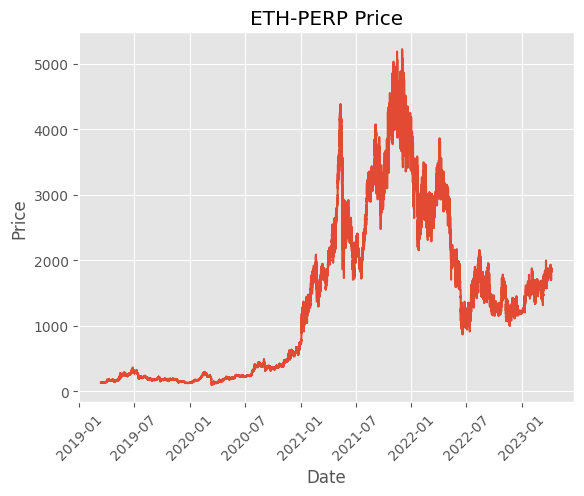

C:\Users\sunny\AppData\Local\Temp\ipykernel_6004\3134436034.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = np.log(df['close'] / df['close'].shift(minutes-1))
C:\Users\sunny\AppData\Local\Temp\ipykernel_6004\3134436034.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volatility'] = df['close'].diff().rolling(minutes-1).std()  # daily volatility over the past 5 days
C:\Users\sunny\AppData\Local\Temp\ipykernel_6004\3134436034.py:27: SettingWithCopyWarning: 
A value is trying to be

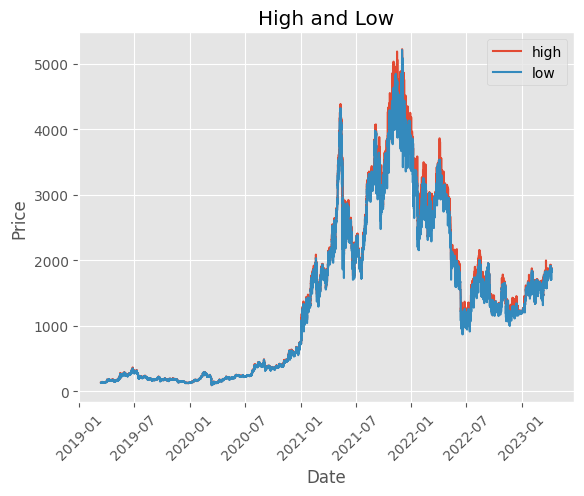

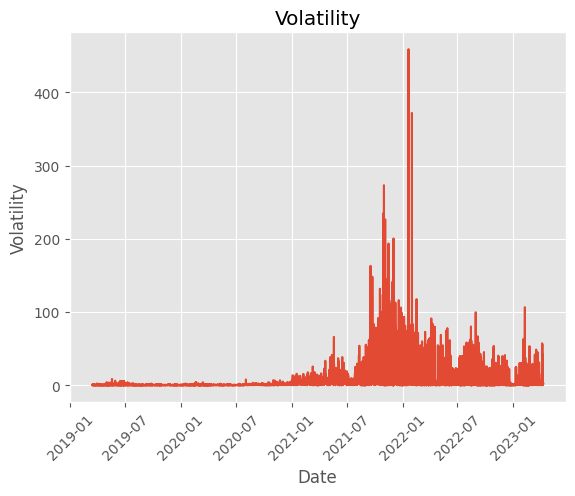

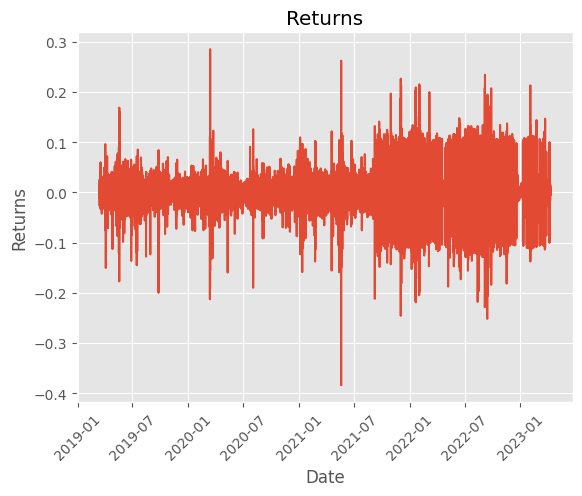

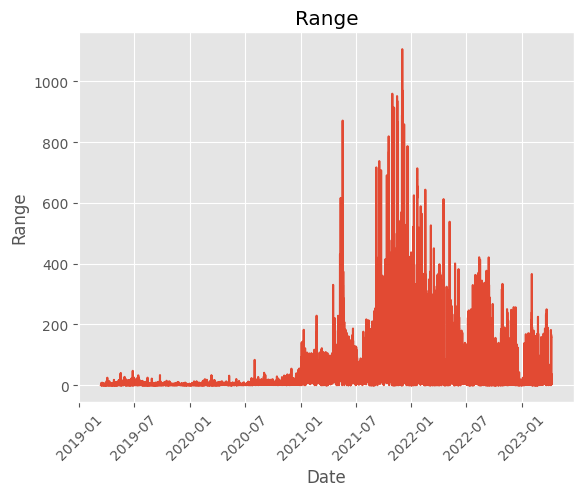

C:\Users\sunny\AppData\Local\Temp\ipykernel_6004\3134436034.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['next_hour_high'] = df_final['high'].shift(-1)
C:\Users\sunny\AppData\Local\Temp\ipykernel_6004\3134436034.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['next_hour_low'] = df_final['low'].shift(-1)
C:\Users\sunny\AppData\Local\Temp\ipykernel_6004\3134436034.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [4]:
df_final = add_features(df, 60)

In [5]:
df_final

,close,returns,volatility,high,low,range,next_hour_high,next_hour_low
timestamp,,,,,,,,
2019-03-13 23:59:00,130.85,-0.002061,0.035151,131.12,130.85,0.27,130.85,130.85
2019-03-14 00:59:00,130.85,0.000000,0.000000,130.85,130.85,0.00,130.85,130.85
2019-03-14 01:59:00,130.85,0.000000,0.000000,130.85,130.85,0.00,130.85,130.85
2019-03-14 02:59:00,130.85,0.000000,0.000000,130.85,130.85,0.00,130.85,130.85
2019-03-14 03:59:00,130.85,0.000000,0.000000,130.85,130.85,0.00,130.85,130.85
...,...,...,...,...,...,...,...,...
2023-04-09 16:12:00,1836.65,0.000436,1.162111,1842.20,1831.60,10.60,1843.20,1836.30
2023-04-09 17:12:00,1840.10,0.001877,1.050581,1843.20,1836.30,6.90,1843.00,1835.45
2023-04-09 18:12:00,1843.00,0.001575,0.965459,1843.00,1835.45,7.55,1860.85,1830.00


# Determine lag variables

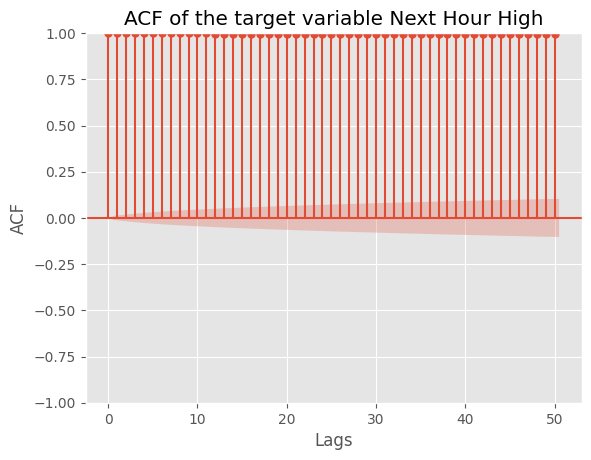

c:\Users\sunny\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


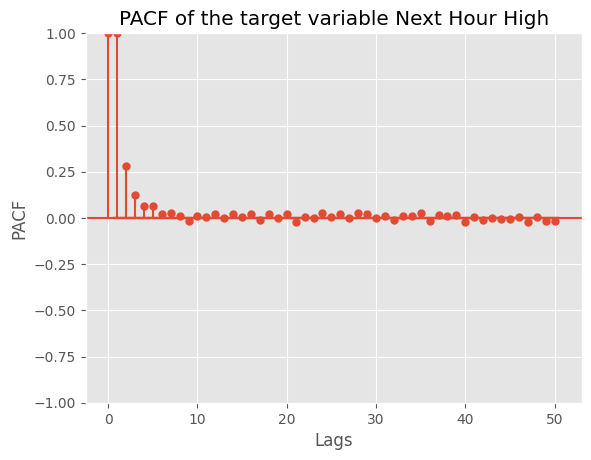

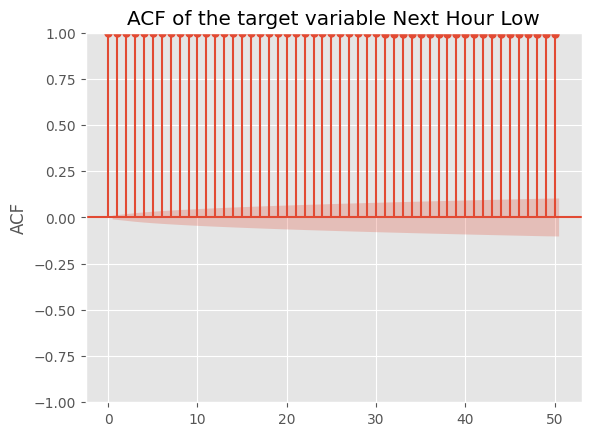

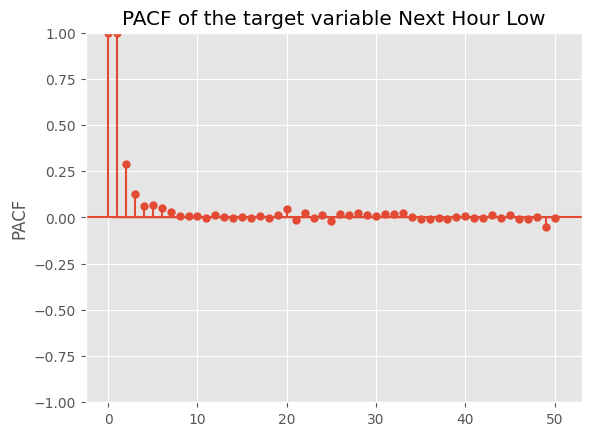

In [6]:
# run a ACF and PACF on the target variables
# ACF
plot_acf(df_final['next_hour_high'], lags=50)
# Add title and labels to the plot.
plt.title('ACF of the target variable Next Hour High')
plt.ylabel('ACF')
plt.xlabel('Lags')
plt.show()

# PACF
plot_pacf(df_final['next_hour_high'], lags=50)
# Add title and labels to the plot.
plt.title('PACF of the target variable Next Hour High')
plt.ylabel('PACF')
plt.xlabel('Lags')
plt.show()

# ACF
plot_acf(df_final['next_hour_low'], lags=50)
# Add title and labels to the plot.
plt.title('ACF of the target variable Next Hour Low')
plt.ylabel('ACF')
plt.show()

# PACF
plot_pacf(df_final['next_hour_low'], lags=50)
# Add title and labels to the plot.
plt.title('PACF of the target variable Next Hour Low')
plt.ylabel('PACF')
plt.show()


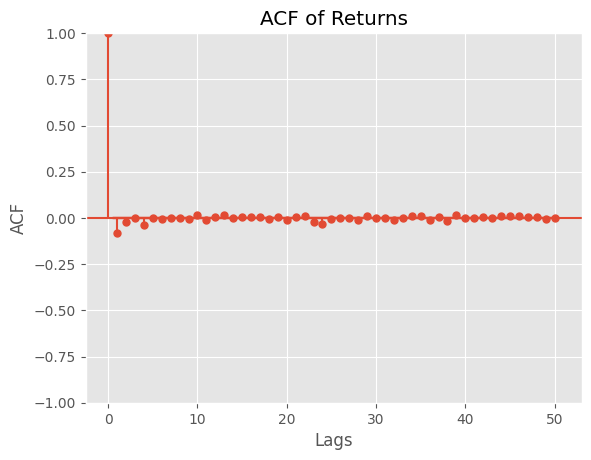

c:\Users\sunny\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


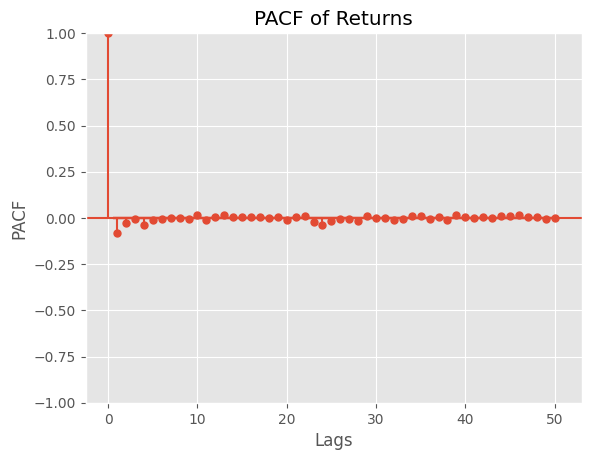

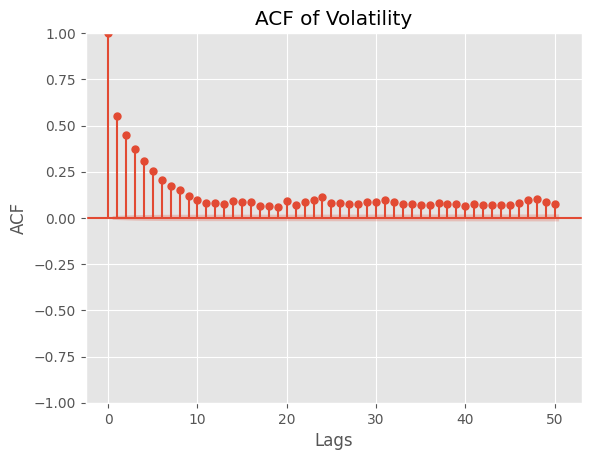

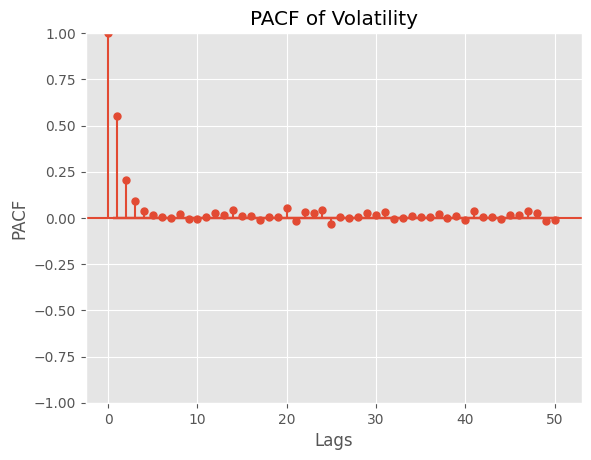

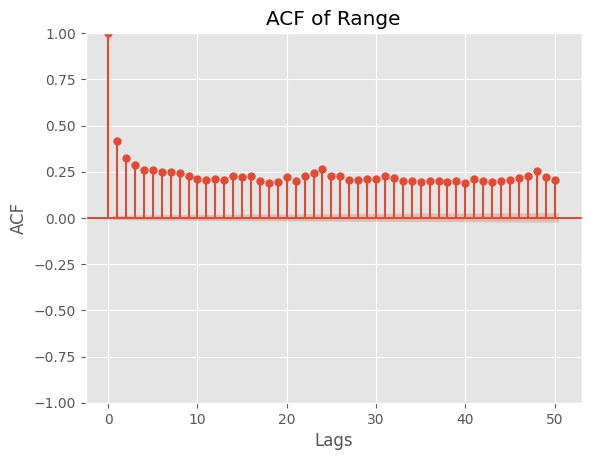

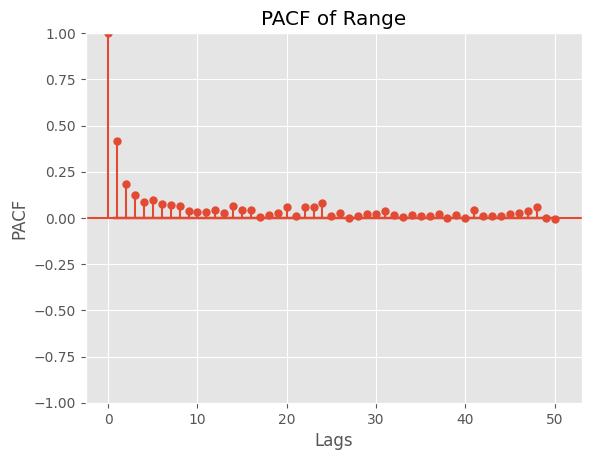

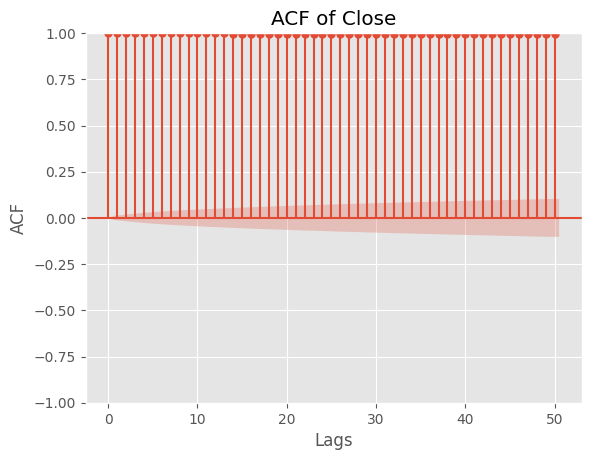

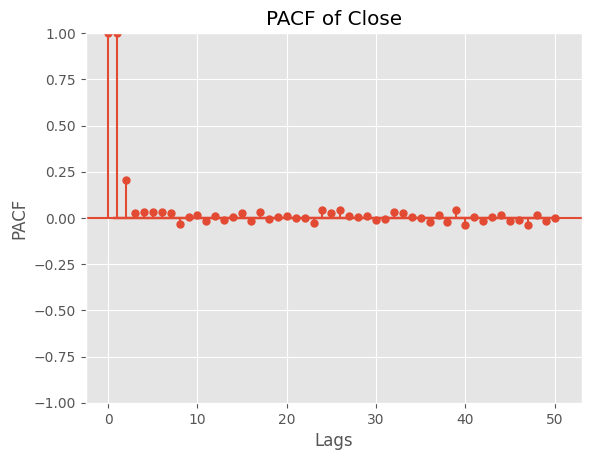

In [32]:
# run a ACF and PACF on returns, volatility range and close
# ACF
plot_acf(df_final['returns'], lags=50)
# Add title and labels to the plot.
plt.title('ACF of Returns')
plt.ylabel('ACF')
plt.xlabel('Lags')
plt.show()

# PACF
plot_pacf(df_final['returns'], lags=50)
# Add title and labels to the plot.
plt.title('PACF of Returns')
plt.ylabel('PACF')
plt.xlabel('Lags')
plt.show()

# ACF
plot_acf(df_final['volatility'], lags=50)
# Add title and labels to the plot.
plt.title('ACF of Volatility')
plt.ylabel('ACF')
plt.xlabel('Lags')
plt.show()

# PACF
plot_pacf(df_final['volatility'], lags=50)
# Add title and labels to the plot.
plt.title('PACF of Volatility')
plt.ylabel('PACF')
plt.xlabel('Lags')
plt.show()

# ACF
plot_acf(df_final['range'], lags=50)
# Add title and labels to the plot.
plt.title('ACF of Range')
plt.ylabel('ACF')
plt.xlabel('Lags')
plt.show()

# PACF
plot_pacf(df_final['range'], lags=50)
# Add title and labels to the plot.
plt.title('PACF of Range')
plt.ylabel('PACF')
plt.xlabel('Lags')
plt.show()

# ACF
plot_acf(df_final['close'], lags=50)
# Add title and labels to the plot.
plt.title('ACF of Close')
plt.ylabel('ACF')
plt.xlabel('Lags')
plt.show()

# PACF
plot_pacf(df_final['close'], lags=50)
# Add title and labels to the plot.
plt.title('PACF of Close')
plt.ylabel('PACF')
plt.xlabel('Lags')
plt.show()



In [8]:
# Add 12 lag features of the columns 'close', 'returns', 'volatility', 'high', 'low', 'range' to the dataframe df_final
def add_lag_features(df_final):
    df_final['close_lag_1'] = df_final['close'].shift(1)
    df_final['close_lag_2'] = df_final['close'].shift(2)
    df_final['close_lag_3'] = df_final['close'].shift(3)
    df_final['close_lag_4'] = df_final['close'].shift(4)

    df_final['returns_lag_1'] = df_final['returns'].shift(1)

    df_final['volatility_lag_1'] = df_final['volatility'].shift
    df_final['volatility_lag_2'] = df_final['volatility'].shift(2)
    df_final['volatility_lag_3'] = df_final['volatility'].shift(3)
    df_final['volatility_lag_4'] = df_final['volatility'].shift(4)

    df_final['high_lag_1'] = df_final['high'].shift(1)
    df_final['high_lag_2'] = df_final['high'].shift(2)
    df_final['high_lag_3'] = df_final['high'].shift(3)

    df_final['low_lag_1'] = df_final['low'].shift(1)
    df_final['low_lag_2'] = df_final['low'].shift(2)
    df_final['low_lag_3'] = df_final['low'].shift(3)

    df_final['range_lag_1'] = df_final['range'].shift(1)
    df_final['range_lag_2'] = df_final['range'].shift(2)

    df_final = df_final.dropna()
    return df_final
    
df_final = add_lag_features(df_final)

In [9]:
df_final.head()

,close,returns,volatility,high,low,range,next_hour_high,next_hour_low,close_lag_1,close_lag_2,...,high_lag_1,high_lag_2,high_lag_3,low_lag_1,low_lag_2,low_lag_3,range_lag_1,range_lag_2,range_lag_3,range_lag_4
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-03-14 03:59:00,130.85,0.0,0.0,130.85,130.85,0.0,130.85,130.85,130.85,130.85,...,130.85,130.85,130.85,130.85,130.85,130.85,0.0,0.0,0.0,0.27
2019-03-14 04:59:00,130.85,0.0,0.0,130.85,130.85,0.0,130.85,130.85,130.85,130.85,...,130.85,130.85,130.85,130.85,130.85,130.85,0.0,0.0,0.0,0.00
2019-03-14 05:59:00,130.85,0.0,0.0,130.85,130.85,0.0,130.85,130.85,130.85,130.85,...,130.85,130.85,130.85,130.85,130.85,130.85,0.0,0.0,0.0,0.00
2019-03-14 06:59:00,130.85,0.0,0.0,130.85,130.85,0.0,130.85,130.85,130.85,130.85,...,130.85,130.85,130.85,130.85,130.85,130.85,0.0,0.0,0.0,0.00
2019-03-14 07:59:00,130.85,0.0,0.0,130.85,130.85,0.0,130.86,130.85,130.85,130.85,...,130.85,130.85,130.85,130.85,130.85,130.85,0.0,0.0,0.0,0.00


C:\Users\sunny\AppData\Local\Temp\ipykernel_6004\1494535952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.drop(['next_hour_high', 'next_hour_low'], axis=1).corr()


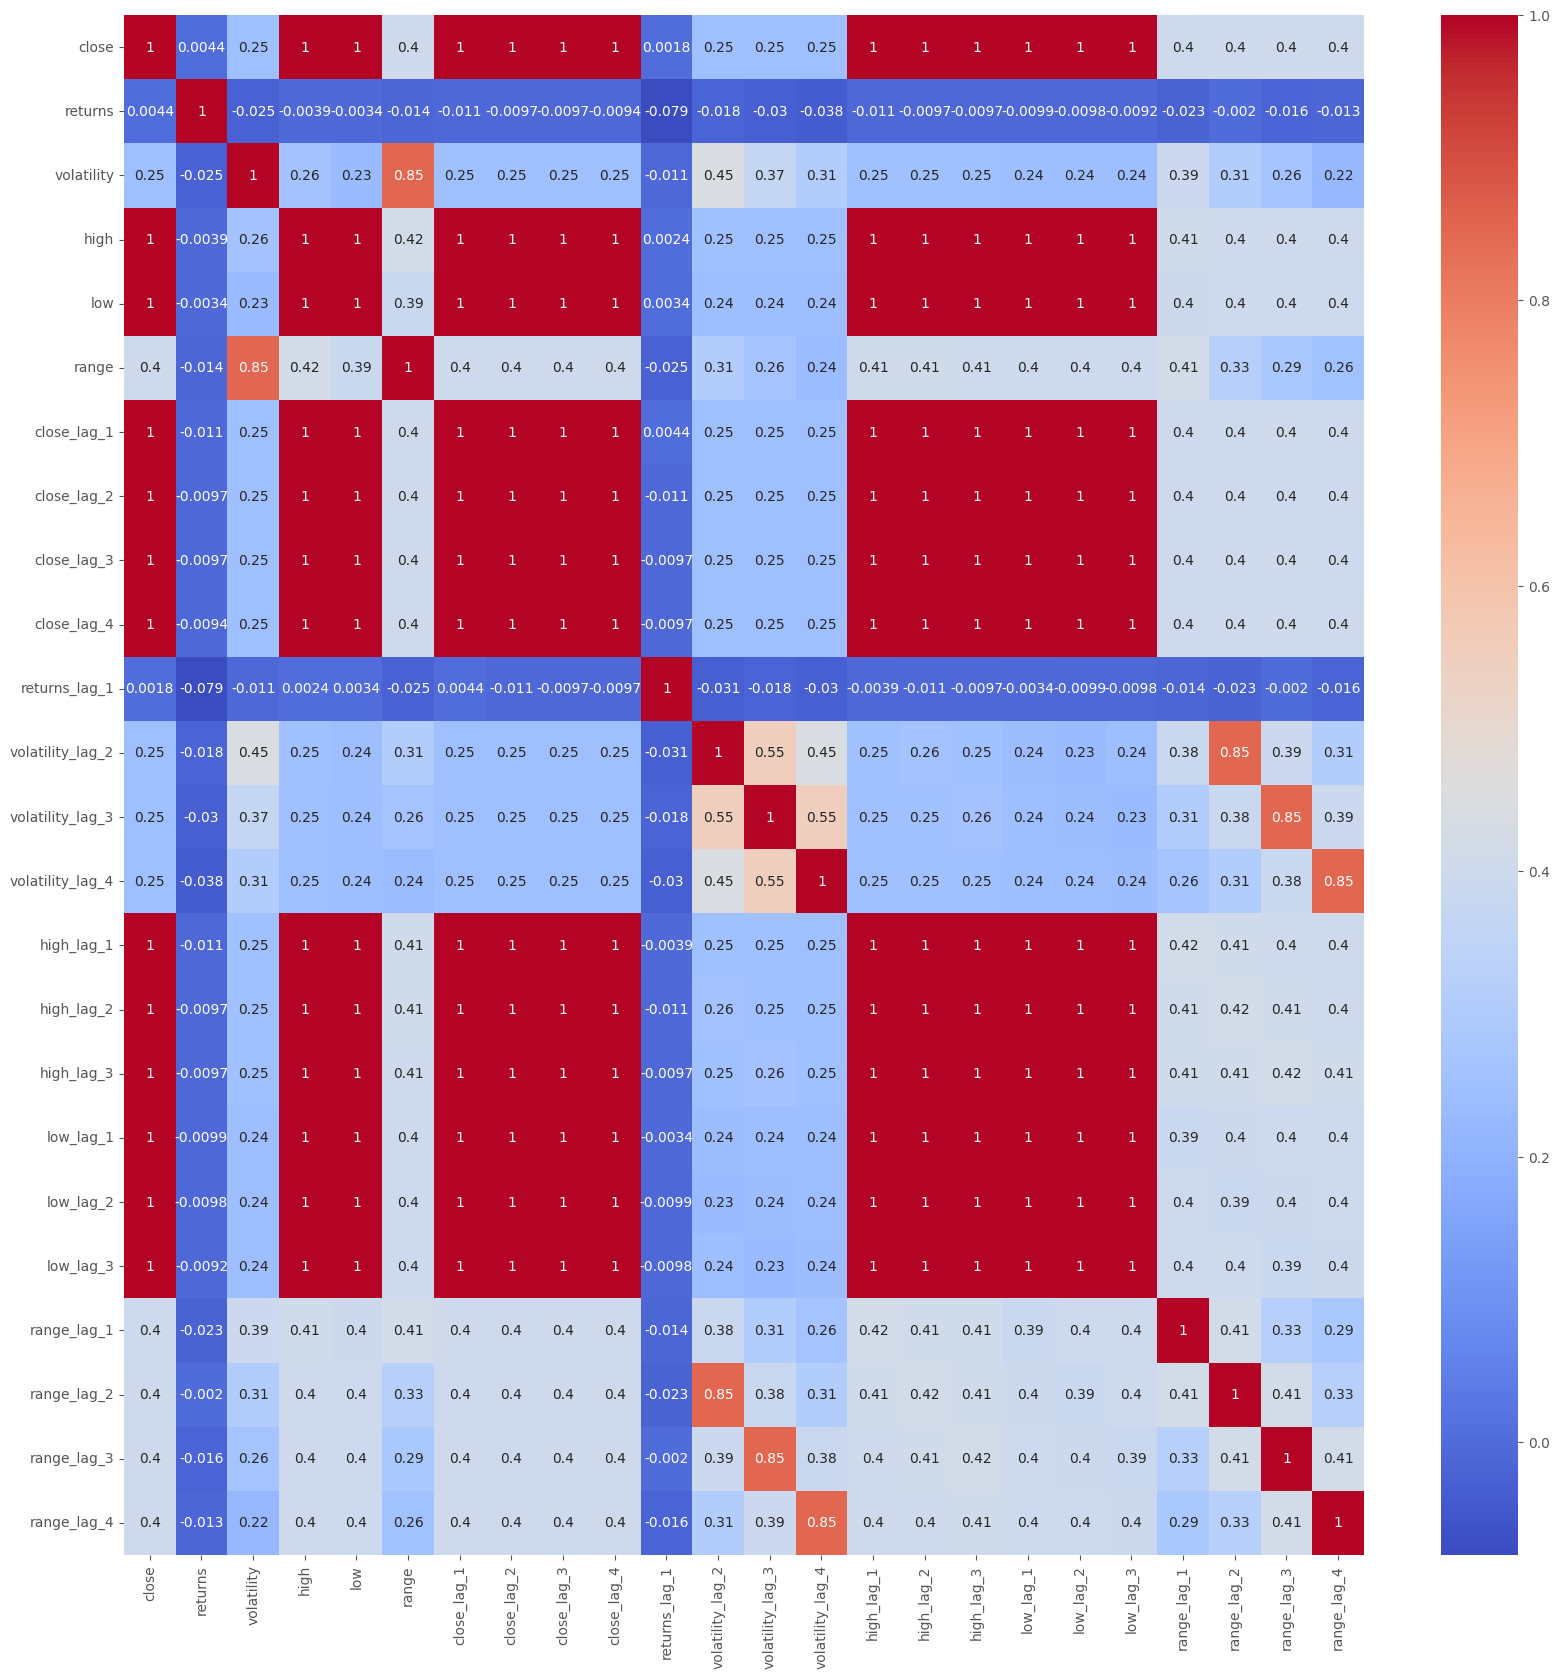

In [10]:
# Investigate correlation between features using a heatmap
# Compute the correlation matrix without the target variables: 'next_hour_high' and 'next_hour_low
corr = df_final.drop(['next_hour_high', 'next_hour_low'], axis=1).corr()
# Create a large heatmap figure
plt.figure(figsize=(20, 20))

# Plot the heatmap with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [21]:
abs_corr = corr.abs()
abs_corr

,close,returns,volatility,high,low,range,close_lag_1,close_lag_2,close_lag_3,close_lag_4,...,high_lag_1,high_lag_2,high_lag_3,low_lag_1,low_lag_2,low_lag_3,range_lag_1,range_lag_2,range_lag_3,range_lag_4
close,1.000000,0.004432,0.246588,0.999742,0.999704,0.402250,0.999770,0.999630,0.999483,0.999347,...,0.999559,0.999425,0.999279,0.999555,0.999398,0.999260,0.401294,0.401846,0.401595,0.401619
returns,0.004432,1.000000,0.024706,0.003903,0.003430,0.013761,0.011398,0.009732,0.009680,0.009426,...,0.010686,0.009692,0.009671,0.009945,0.009765,0.009198,0.023397,0.002005,0.016075,0.012820
volatility,0.246588,0.024706,1.000000,0.260783,0.231805,0.852248,0.246768,0.247187,0.247266,0.247085,...,0.252498,0.251213,0.250602,0.241350,0.243258,0.244258,0.388945,0.306065,0.264252,0.220266
high,0.999742,0.003903,0.260783,1.000000,0.999379,0.417370,0.999727,0.999564,0.999424,0.999282,...,0.999601,0.999421,0.999266,0.999399,0.999280,0.999152,0.406407,0.404766,0.404040,0.403245
low,0.999704,0.003430,0.231805,0.999379,1.000000,0.385100,0.999684,0.999497,0.999349,0.999204,...,0.999369,0.999239,0.999099,0.999542,0.999340,0.999168,0.396659,0.398453,0.399244,0.399566
range,0.402250,0.013761,0.852248,0.417370,0.385100,1.000000,0.402353,0.402918,0.403059,0.403084,...,0.407181,0.405811,0.405387,0.397445,0.399515,0.400613,0.414591,0.325300,0.285879,0.256762
close_lag_1,0.999770,0.011398,0.246768,0.999727,0.999684,0.402353,1.000000,0.999770,0.999630,0.999483,...,0.999742,0.999559,0.999425,0.999704,0.999555,0.999398,0.402257,0.401297,0.401855,0.401604
close_lag_2,0.999630,0.009732,0.247187,0.999564,0.999497,0.402918,0.999770,1.000000,0.999770,0.999630,...,0.999727,0.999742,0.999559,0.999684,0.999704,0.999555,0.402361,0.402261,0.401306,0.401864
close_lag_3,0.999483,0.009680,0.247266,0.999424,0.999349,0.403059,0.999630,0.999770,1.000000,0.999770,...,0.999564,0.999727,0.999742,0.999497,0.999685,0.999704,0.402925,0.402365,0.402270,0.401315
close_lag_4,0.999347,0.009426,0.247085,0.999282,0.999204,0.403084,0.999483,0.999630,0.999770,1.000000,...,0.999424,0.999564,0.999727,0.999349,0.999497,0.999685,0.403066,0.402929,0.402373,0.402278


In [29]:
dict = {}
# total number of features
total_features = (len(abs_corr.columns) * len(abs_corr.columns) - len(abs_corr.columns)) / 2

# print percentage of features with a correlation > 0.1, 0.3, 0.5, 0.7, 0.9
for threshold in [0.1, 0.3, 0.5, 0.7, 0.9]:
    # create a boolean mask for each threshold
    mask = abs_corr < threshold
    # get the number of features within the threshold
    n_features = abs_corr[mask].count().sum()
    # if correlation is not higher than 0.9, divide by 2, else -24 then divide by 2
    n_features = (n_features - 24) / 2
    print(f'{n_features} features have a absolute correlation lower than {threshold}')
    print(f'This is {round(n_features / total_features * 100, 2)}% of the total features')

    # add the number of features within the threshold to the dictionary
    dict[threshold] = round(n_features / total_features * 100, 2)

33.0 features have a absolute correlation lower than 0.1
This is 11.96% of the total features
93.0 features have a absolute correlation lower than 0.3
This is 33.7% of the total features
180.0 features have a absolute correlation lower than 0.5
This is 65.22% of the total features
182.0 features have a absolute correlation lower than 0.7
This is 65.94% of the total features
186.0 features have a absolute correlation lower than 0.9
This is 67.39% of the total features


In [31]:
# make a correlation percentage df
corr_percentage = pd.DataFrame(dict.items(), columns=['Threshold', 'Percentage'])
corr_percentage

,Threshold,Percentage
0,0.1,11.96
1,0.3,33.70
2,0.5,65.22
3,0.7,65.94
4,0.9,67.39


In [28]:
# save the final dataframe to a csv file
df_final.to_csv('eth_perp_final.csv')